In [ ]:
# default_exp core

# Fancy Callbacks

> Fancy callbacks for Keras. This was created mainly to explore the usage of nbdev.

In [ ]:
#hide
from nbdev.showdoc import *

## Plot metrics callback

> This object will be our main callback used to organize our plottings.

In [ ]:
#export
#hide
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
#export
class PlotMetrics(tf.keras.callbacks.History):
    def __init__(self, figsize=(9, 4)):
        super(PlotMetrics, self).__init__()
        self.figsize = figsize
    def _get_unique_metrics(self):
        unique_names = [name for name in self.history.keys() if name[:4]!='val_']
        return unique_names

## Plot metrics after training

> Normally, we all like to plot our metrics after the training has concluded. Because of this, we built a `Callback` that will automatically plot them for you once the training is completed.

In [ ]:
#export
class PlotMetricsEnd(PlotMetrics):
    def __init__(self, **kwargs):
        super(PlotMetricsEnd, self).__init__(**kwargs)

    def on_train_end(self, logs=None):
        unique_names = self._get_unique_metrics()
        fig, axes = plt.subplots(1, len(unique_names), figsize=self.figsize)
        for i, name in enumerate(unique_names):
            axes[i].plot(self.history[name], label='Train')
            axes[i].plot(self.history[f'val_{name}'], label='Validation')
            axes[i].set_title(name)
            axes[i].legend()
        plt.show()

## Plot metrics during training

Insted of settling with the Keras way of showing the progress during the training, sometimes its fancier to be able to see a dynamic plot of your metrics during training.

In [ ]:
#export
class PlotMetricsProgress(PlotMetrics):
    def __init__(self, **kwargs):
        super(PlotMetricsProgress, self).__init__(**kwargs)
    
    def on_epoch_end(self, epoch, logs=None):
        super().on_epoch_end(epoch, logs)
        unique_names = self._get_unique_metrics()
        fig, axes = plt.subplots(1, len(unique_names), figsize=self.figsize)
        for i, name in enumerate(unique_names):
            axes[i].plot(self.history[name], label='Train')
            axes[i].plot(self.history[f'val_{name}'], label='Validation')
            axes[i].set_title(name)
            axes[i].legend()
        plt.suptitle(f'Epoch {epoch+1}')
        clear_output()
        plt.show()

In [ ]:
#hide
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
#hide
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train[:,:,:,None]/255.0
X_test = X_test[:,:,:,None]/255.0

In [ ]:
#hide
model = tf.keras.Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=X_train[0].shape),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#hide
cb = PlotMetricsProgress()

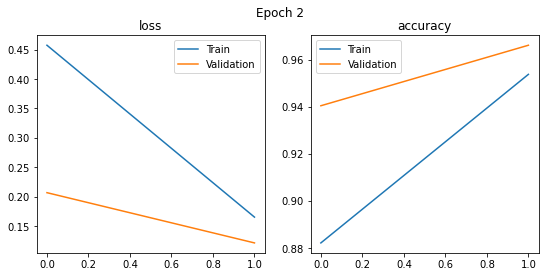

In [ ]:
#hide
history = model.fit(X_train, Y_train, 
                    epochs=2, batch_size=256,
                    validation_data=(X_test, Y_test),
                    callbacks=[cb])

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted index.ipynb.
